In [1]:
## This script just makes a very simple bar chart of waste type (plastic vs non-plastic) by year.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for formatting dates on the plot??
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns

# handle date time
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
processed_data = 'Datajam_copy.xlsx'
df = pd.read_excel(processed_data)
print(df.head)

<bound method NDFrame.head of       Year                                          Site Name  \
0     2017                          Inks Lake Recreation Area   
1     2018                     Panmure Island Provincial Park   
2     2018                    Garry Point Park - Public beach   
3     2018                                Wickanninnish Beach   
4     2019                                          Rice Lake   
5     2019                                         St-Maurice   
6     2018                                        Pier 4 Park   
7     2017         English Bay Beach From Bidwell to Bute St.   
8     2018                                  Toronto Wavedecks   
9     2018                       Sylvan Lake - Lakefront Park   
10    2019  Land of Laziness Lake (formerly known as Loon ...   
11    2019   Quidi Vidi Lake Shoreline at Rennies River Trail   
12    2019                                Innisfil Beach Park   
13    2019                    Cherry Beach - Clark Beach Par

In [3]:
# drop columns with all blank values
df.dropna(how='all', axis=1)

,Year,Site Name,Site ID (2017 onward),Province,Nearest City,Municipality,Site Coordinator ID (2017 onwards),Group name (2017 onwards),Group type,Site/Shoreline Type,...,Other Plastic/Foam Packaging (Other/Misc Packaging 2017 onwards),"Other Plastic Bottles (oil, bleach etc) (Containers for 2017 onwards)",Balloons,Tires,Toys,"Clothing, Shoes",Foam (2017 onwards),Personal hygiene (2017 onwards),Tiny Plastic or Foam (2017 onwards),Other
0,2017,Inks Lake Recreation Area,3096,BC,Kamloops,Kamloops,3502,1st Vallewyview Scouts,"Scout, Cubs, Beavers",lake or pond,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2018,Panmure Island Provincial Park,487,PE,Montague,Prince Edward Island Provincial Park,4185,MRHS,School/Educational Facility,"ocean, inlet or bay",...,0.0,0.0,2.0,0.0,3.0,3.0,34.0,1.0,250,0.0
2,2018,Garry Point Park - Public beach,2974,BC,Richmond,City of Richmond,188,10th Richmond Sea Scout Group,"Scout, Cubs, Beavers","ocean, inlet or bay",...,88.0,0.0,0.0,0.0,6.0,3.0,0.0,1.0,255,6.0
3,2018,Wickanninnish Beach,4111,BC,Ucluelet,Parks Canada,9270,Seahore Walk Volunteers,Concerned Citizens,"ocean, inlet or bay",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,2019,Rice Lake,1370,BC,North Vancouver,Metro Vancouver,21560,Capilano University Rice Lake Clean up,College/University,lake or pond,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
5,2019,St-Maurice,5473,QC,GaspÃ©,Gaspe peninsula,16994,OGN 2019 Ville de GaspÃ©,Community Group,"ocean, inlet or bay",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
6,2018,Pier 4 Park,2634,ON,Hamilton,City of Hamilton,8154,West Highland Baptist Church,Community Group,lake or pond,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,0.0
7,2017,English Bay Beach From Bidwell to Bute St.,1810,BC,Vancouver,City of Vancouver,251,CWRA-SYP/CEP,Community Group,"ocean, inlet or bay",...,0.0,0.0,2.0,0.0,4.0,8.0,30.0,2.0,29,0.0
8,2018,Toronto Wavedecks,4881,ON,Toronto,City of Toronto,11822,The Clean Lakes Corp,Corporate or Workplace Group,lake or pond,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
9,2018,Sylvan Lake - Lakefront Park,1511,AB,Sylvan Lake,Town of Sylvan Lake,3665,Sylvan Lake Team Up to Clean Up,Community Group,lake or pond,...,0.0,0.0,0.0,0.0,139.0,0.0,109.0,0.0,1201,0.0


In [4]:
# get list of column names
col_names = df.columns.values.tolist()
# for col in col_names:
#     print(col)
df['Cleanup date'] = pd.to_datetime(df['Cleanup date'])

In [5]:
# Categories by Industry
hospitality = ['Food Wrappers/Containers','Bottle Caps (plastic and metal - 2017 onwards)','Lids (Plastic)',\
             'Straws, Stirrers (Straws from 2017 onwards)','Forks, Knives, Spoons (Utensils from 2017 onwards)',\
             'Beverage Bottles (Plastic) 2 liters or less (Plastic bottles from 2017 onwards)', \
             'Cups and Plates (Plastic) (Plastic cup from 2017 onwards)']
household = ['Personal hygiene (2017 onwards)','Clothing, Shoes','Toys','Tires',\
             'Other Plastic Bottles (oil, bleach etc) (Containers for 2017 onwards)', \
            'Bags (Plastic) (Plastic bags from 2017 onwards)']
leisure = ['Buoys/Floats (fishing buoy, pot, or trap from 2017 onwards)','Fishing Nets','Balloons',\
          '6-Pack Holders']
other = ['Other','Tiny Plastic or Foam (2017 onwards)','Foam (2017 onwards)','Unusual Items','Coffee cups',\
        'Other  Plastic/Foam Packaging (Other/Misc Packaging 2017 onwards)']
non_plastic = ['Bags (Paper) (Paper from 2017 onwards)', 'Beverage Cans','Glass Beverage Bottles','Cigarettes/Cigarette Filters','Rope']

In [6]:
# Create category totals columns
df['Hospitality'] = df[hospitality].sum(axis=1)
df['Household'] = df[household].sum(axis=1)
df['Leisure'] = df[leisure].sum(axis=1)
df['Other'] = df[other].sum(axis=1)
df['Non-plastic'] = df[non_plastic].sum(axis=1)
# Total of all plastic sub-categories
df['Total Plastic'] = df[['Hospitality', 'Household','Leisure','Other']].sum(axis=1)

In [7]:
# 

In [8]:
# Create summary by year, province and plastic or non
year_prov_mat = df.loc[:,['Year','Cleanup date','Province','Non-plastic','Total Plastic']]
year_prov_mat.rename(columns = {'Total Plastic' : 'Plastic'}, inplace = True)
# print(year_prov_mat.head())

In [9]:
# Summarize by year and material (plastic or non)
year_mat = year_prov_mat.groupby('Year', as_index=False).sum()


In [10]:
# Divide the item counts by 1000 each (for legibility)
year_mat['Plastic'] = year_mat['Plastic'].div(1000).round(2)
year_mat['Non-plastic'] = year_mat['Non-plastic'].div(1000).round(2)

In [11]:
# Set seaboard to default aesthetics
sns.set()

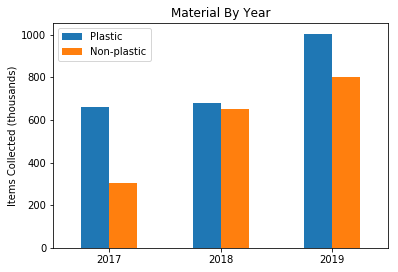

In [18]:
# Using plt.subplots to format
fig, ax = plt.subplots()
year_mat.plot(x='Year', y=['Plastic','Non-plastic'], kind='bar', ax=ax);
ax.set(title='Material By Year', xlabel='', ylabel='Items Collected (thousands)');
# X-axis labels horizontal
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
plt.gcf().subplots_adjust(bottom=0.10)


In [16]:
# Export bar chart to jpg file
plt.savefig('plastic v non.jpg', dpi=300)